In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [2]:
cars = pd.read_csv('data/CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars.shape

(205, 26)

In [4]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
cars.corr()['price']

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

### Step 2 : Data Cleaning and Preparation

### Step 3: Visualizing the datam

Curb weight is the weight of the vehicle, including a full tank of fuel and all standard equipment.

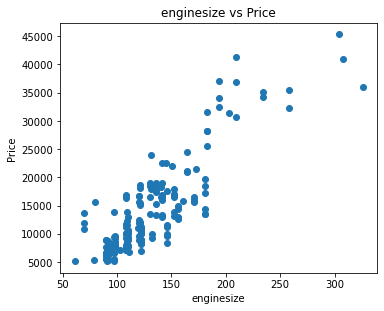

In [7]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))


scatter('enginesize', 4)

plt.tight_layout()

In [40]:
X = cars[['enginesize', 'horsepower', 'curbweight', 'carlength', 'carwidth', 'highwaympg']]
X.shape

(205, 6)

In [41]:
y = cars['price']
y.shape

(205,)

In [42]:
def h(x, w):
    return np.dot(x, w)

In [43]:
x_0 = np.ones((205,1))
X = np.hstack((x_0, X))
X

array([[  1. , 130. , 111. , ..., 168.8,  64.1,  27. ],
       [  1. , 130. , 111. , ..., 168.8,  64.1,  27. ],
       [  1. , 152. , 154. , ..., 171.2,  65.5,  26. ],
       ...,
       [  1. , 173. , 134. , ..., 188.8,  68.9,  23. ],
       [  1. , 145. , 106. , ..., 188.8,  68.9,  27. ],
       [  1. , 141. , 114. , ..., 188.8,  68.9,  25. ]])

In [44]:
h(X[0],w=[1000, 0.5])

ValueError: shapes (7,) and (2,) not aligned: 7 (dim 0) != 2 (dim 0)

In [45]:
w = [0.001, -0.001]

In [46]:
alpha = 0.0001

In [47]:
def grad(X, y, w):
    grad = []
    for i in range(len(X)):
        x_i, y_i = X[i], y[i]
        grad.append((h(x_i, w) - y_i) * x_i)
    grad = np.array(grad)
    return np.mean(grad, axis=0)

In [48]:
grad(X, y, w)

ValueError: shapes (7,) and (2,) not aligned: 7 (dim 0) != 2 (dim 0)

In [49]:
def loss(X, y, w):
    return np.mean((X @ w - y)**2)

In [50]:
loss (X, y, w)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 7)

In [51]:
alpha = 0.00001
w = [0.001, -0.001]
for _ in range(100):
    w = w - alpha * grad(X ,y, w)
    print(loss(X, y,w))

ValueError: shapes (7,) and (2,) not aligned: 7 (dim 0) != 2 (dim 0)

In [52]:
grad(X ,y, w)

ValueError: shapes (7,) and (2,) not aligned: 7 (dim 0) != 2 (dim 0)

Text(0.5, 0, 'enginesize')

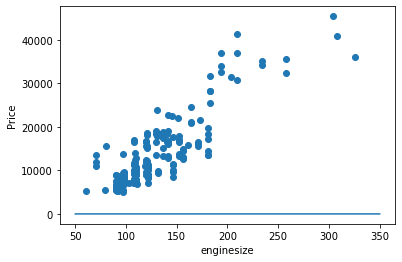

In [54]:
x = np.linspace(50,350,num=1000000)
z = w[0] + w[1]*x
plt.plot(x, z)
plt.scatter(X[:,1],y)
plt.ylabel('Price')
plt.xlabel('enginesize')

In [37]:
x = [1, 900]
h(x,w)

99649.63691613267